# Vector projections 

## first sub task 

### Mathematical description and problem Setup


Given two vectors $$ \mathbf{a}, \mathbf{b} \in \mathbb{R}^2 $$,  
the **projection of** $$ \mathbf{a} $$ **onto** $$ \mathbf{b} $$ represents the component of $$ \mathbf{a} $$ that lies along the direction of $$ \mathbf{b} $$.  
Geometrically, it is the *shadow* of $$ \mathbf{a} $$ on the line defined by $$ \mathbf{b} $$

We compute this projection in two ways:

1. **Analytical (closed form)** — from vector algebra.  
2. **Gradient Descent (iterative)** — from minimizing a least-squares cost.

Lets define it. 


###  Analytical projection (Closed form)


####  Definition via Dot Product



The projection of $$ \mathbf{a} $$ onto $$ \mathbf{b} $$ is given by:

$$
\operatorname{proj}_{\mathbf{b}}(\mathbf{a})
= \frac{\mathbf{a}\cdot\mathbf{b}}{\mathbf{b}\cdot\mathbf{b}} \, \mathbf{b}, 
\qquad \text{for } \mathbf{b}\neq \mathbf{0}.
$$

Where:

- $$ \mathbf{a}\cdot\mathbf{b} $$ → alignment between vectors.  
- $$ \mathbf{b}\cdot\mathbf{b} = \|\mathbf{b}\|^2 $$ → squared magnitude of $$ \mathbf{b} $$.  
- Scalar coefficient:

$$
c^\star = \frac{\mathbf{a}\cdot\mathbf{b}}{\mathbf{b}\cdot\mathbf{b}}
$$

Hence:

$$
\operatorname{proj}_{\mathbf{b}}(\mathbf{a}) = c^\star \mathbf{b}
$$

 If $$ \mathbf{b} = \mathbf{0} $$, the projection is undefined (or zero by convention).



####  Least-Squares Derivation



We can derive the same result by minimizing:

$$
\min_{c\in\mathbb{R}} \; J(c) = \|\mathbf{a} - c\mathbf{b}\|^2
$$

Expanding the cost:

$$
J(c) = (\mathbf{a}-c\mathbf{b})^\top(\mathbf{a}-c\mathbf{b})
     = \mathbf{a}^\top\mathbf{a} - 2c(\mathbf{a}^\top\mathbf{b}) + c^2(\mathbf{b}^\top\mathbf{b})
$$

Setting derivative to zero:

$$
\frac{dJ}{dc} = -2(\mathbf{a}\cdot\mathbf{b}) + 2c(\mathbf{b}\cdot\mathbf{b}) = 0
\Rightarrow
c^\star = \frac{\mathbf{a}\cdot\mathbf{b}}{\mathbf{b}\cdot\mathbf{b}}
$$

Got same solution as before.

####  Orthogonal Decomposition



Let:

$$
\mathbf{p} = \operatorname{proj}_{\mathbf{b}}(\mathbf{a}) = c^\star \mathbf{b}
$$

$$
\mathbf{r} = \mathbf{a} - \mathbf{p}
$$

Then:

$$
\mathbf{a} = \mathbf{p} + \mathbf{r}, \quad \mathbf{r}\cdot\mathbf{b} = 0
$$

That is, the residual $$ \mathbf{r} $$ is **orthogonal** to $$ \mathbf{b} $$.

And by the Pythagorean theorem:

$$
\|\mathbf{a}\|^2 = \|\mathbf{p}\|^2 + \|\mathbf{r}\|^2
$$


####  Angle Interpretation


If $$ \theta $$ is the angle between $$ \mathbf{a} $$ and $$ \mathbf{b} $$:

$$
\mathbf{a}\cdot\mathbf{b} = \|\mathbf{a}\|\,\|\mathbf{b}\|\,\cos\theta
\Rightarrow
c^\star = \frac{\|\mathbf{a}\|\cos\theta}{\|\mathbf{b}\|}
$$

Thus, the **length of the projection** is $$ \|\mathbf{a}\|\cos\theta $$.


### proceed with the gradiente descent algorithm


####  Gradient descent formulation


We minimize the same cost iteratively:

$$
J(c) = \|\mathbf{a} - c\mathbf{b}\|^2 
= \mathbf{a}^\top\mathbf{a} - 2c(\mathbf{a}^\top\mathbf{b}) + c^2(\mathbf{b}^\top\mathbf{b})
$$


#### Gradient and update rule




Derivative:

$$
\frac{dJ}{dc} = -2(\mathbf{a}\cdot\mathbf{b}) + 2c(\mathbf{b}\cdot\mathbf{b})
$$

Gradient descent update:

$$
c_{k+1} = c_k - \eta \frac{dJ}{dc}
= c_k - \eta[-2(\mathbf{a}\cdot\mathbf{b}) + 2c_k(\mathbf{b}\cdot\mathbf{b})]
$$

Simplified:

$$
c_{k+1} = (1 - 2\eta\|\mathbf{b}\|^2)c_k + 2\eta(\mathbf{a}\cdot\mathbf{b})
$$

At convergence:

$$
c^\star = \frac{\mathbf{a}\cdot\mathbf{b}}{\mathbf{b}\cdot\mathbf{b}}
$$



#### Convergence condition


Convergence requires:

$$
0 < \eta < \frac{1}{\|\mathbf{b}\|^2}
$$

A safer bound (from Lipschitz constant $$ L=2\|\mathbf{b}\|^2 $$):

$$
0 < \eta < \frac{1}{2\|\mathbf{b}\|^2}
$$

Convergence rate:

$$
|c_k - c^\star| \le \rho^k |c_0 - c^\star|, \quad \rho = |1 - 2\eta\|\mathbf{b}\|^2| < 1
$$

####  Practical Notes

- Large $$ \|\mathbf{b}\| $$ → use smaller $$ \eta $$.  
- Stop when $$ |c_{k+1}-c_k| < \varepsilon $$ or cost stops decreasing.  
- If $$ \mathbf{b}=0 $$ → gradient vanishes → undefined projection.

### code implementation

#### libraries 

on this case, simply use numpy and matplotlib to manage and plot data 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### setting up vectors

In [4]:
a = np.array([2.0, 7.0])   # vector being projected
b = np.array([1.0, 2.0])   # direction (onto which 'a' is projected)

print("a =", a)
print("b =", b)


a = [2. 7.]
b = [1. 2.]


see vectors on space: 

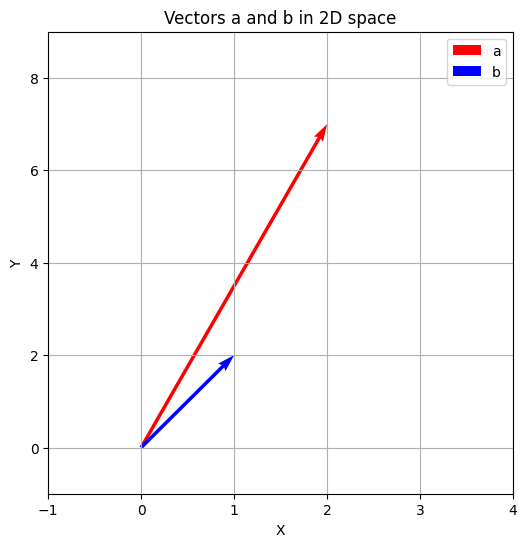

In [5]:
plt.figure(figsize=(6,6))
plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='r', label='a')
plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='b', label='b')
plt.xlim(-1, max(a[0], b[0]) + 2)
plt.ylim(-1, max(a[1], b[1]) + 2)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Vectors a and b in 2D space')
plt.show()

### Analytical vs gradient descent



| Aspect | Analytical | Gradient Descent |
|--------|-------------|------------------|
| Method | Closed-form algebraic | Iterative numerical |
| Formula | $$ c^\star = \frac{\mathbf{a}\cdot\mathbf{b}}{\mathbf{b}\cdot\mathbf{b}} $$ | $$ c_{k+1} = c_k - \eta\,\frac{dJ}{dc} $$ |
| Speed | Instant | Depends on $$ \eta $$ |
| Accuracy | Exact | Approximate (convergent) |
| Insight | Geometric | Optimization-based |


 **Summary:**  
This exercise connects **geometry**, **linear algebra**, and **optimization**,  
showing that both analytical and iterative methods describe the same projection in different mathematical frameworks.